In [1]:
from train import train_net, load_model, load_sess
from audio_reader import AudioReader, AudioReaderSpectrogram
from model import AutoEncoderModel, AutoEncoderSpectrogram
import helper as hp
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Resultats Notes sintetiques

In [2]:
net = AutoEncoderSpectrogram(batch_size = 8, histograms = True)
reader = AudioReaderSpectrogram(audio_dir='data', sample_rate=16000, sample_size=1024, size_queue = 500)
sess, cost_squared = train_net(net, reader, reader.total_data, error = 'squared')

100%|██████████| 432110/432110 [2:26:05<00:00, 52.50it/s]


saving model:logdir/AE_A/2017-01-15T08-27-36/autoencoder_audio.ckpt-432109...
Optimization Finished!
Total errors: 0


In [2]:
net = AutoEncoderSpectrogram(batch_size = 8, histograms = True)
reader = AudioReaderSpectrogram(audio_dir='data', sample_rate=16000, sample_size=1024, size_queue = 500)
sess, saver = load_sess(net, reader,'logdir/AE_A/2017-01-15T08-27-36/')

Trying to restore saved checkpoints from logdir/AE_A/2017-01-15T08-27-36/ ...  Checkpoint found: logdir/AE_A/2017-01-15T08-27-36/autoencoder_audio.ckpt-432109
  Global step was: 432109
  Restoring... Done.


In [3]:
audio_original, info = reader.get_batch_test()
audio_recuperat = sess.run(net.output, feed_dict={net.x: audio_original , net.keep_prob: 1.})
print np.shape(audio_original)

(49579, 903)


In [4]:
best = hp.best_results_quadratic(audio_original, audio_recuperat)
print "mean squared: ", np.mean([x[0] for x in best]), "mean snr: ",np.mean([x[1] for x in best])
print len(best)

mean squared:  7.59987049993e-10 mean snr:  1.59634303592
36619


In [5]:
_1,_2,_3,_4,_5,_6 = 0,1, 2, 50, -50, -1
indexos = [best[_1][2], best[_2][2], best[_3][2], best[_4][2], best[_5][2], best[_6][2]]
info_mostra = [best[_1], best[_2], best[_3], best[_4], best[_5], best[_6]]
info_mostra

[(5.0412620860451246e-10, 3.9339133253702969, 11912),
 (5.0495002476897032e-10, 3.9295793619218982, 10395),
 (5.0527757412466702e-10, 3.9936890312611943, 23970),
 (5.226019432977168e-10, 3.8767164470390396, 42292),
 (1.0336457098828563e-09, -0.80408523573672275, 23841),
 (1.1283338210919655e-09, -1.5219500731483226, 35723)]

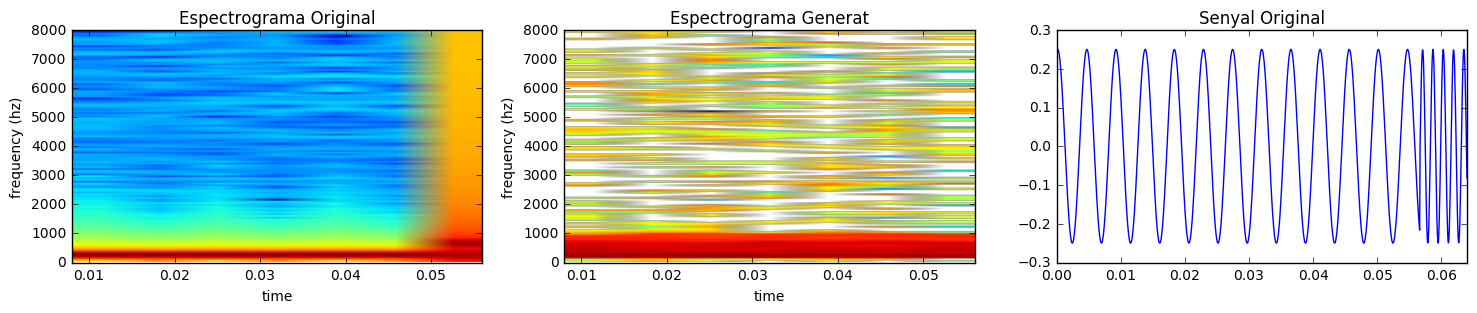

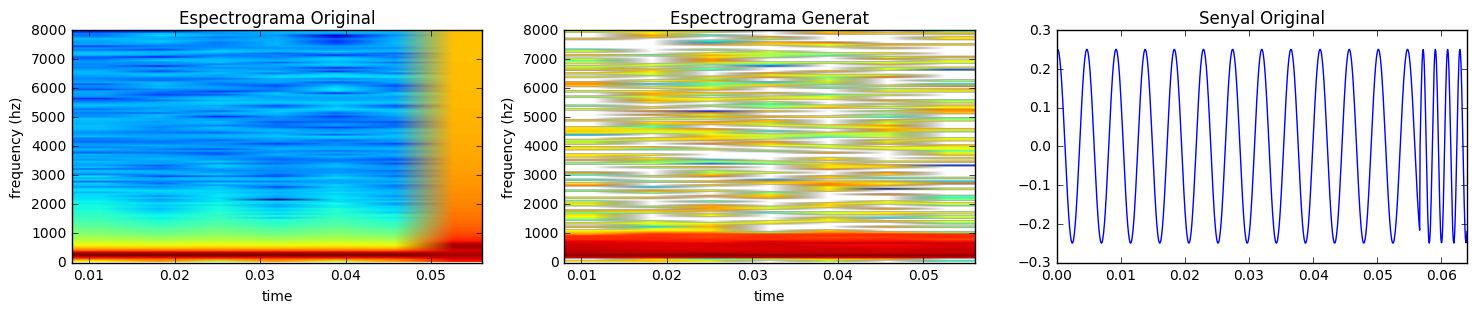

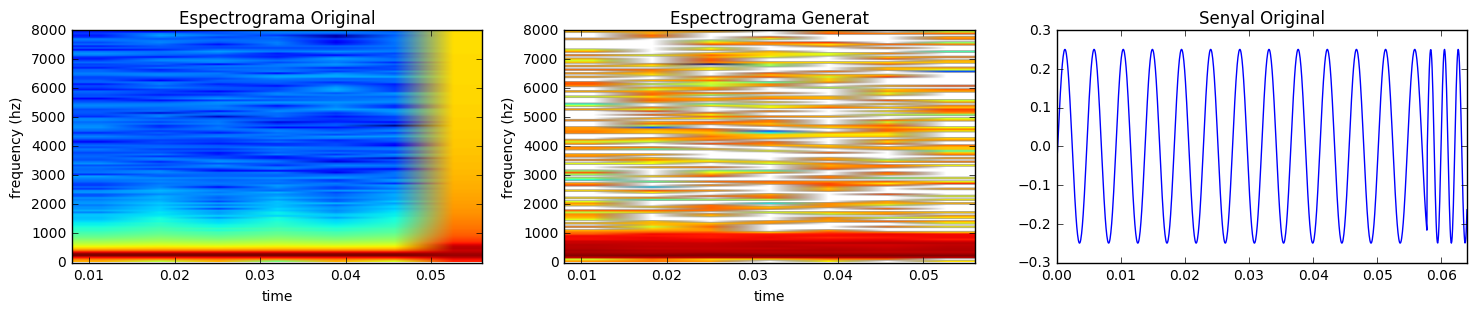

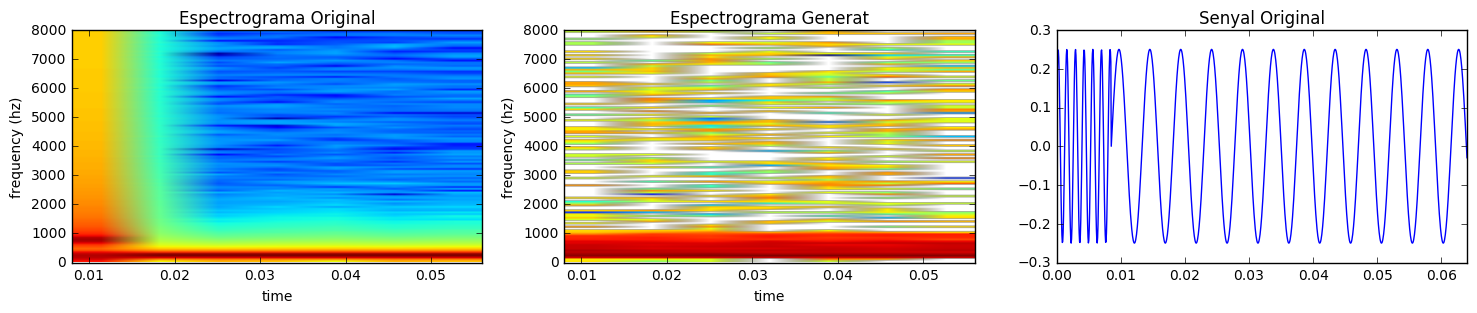

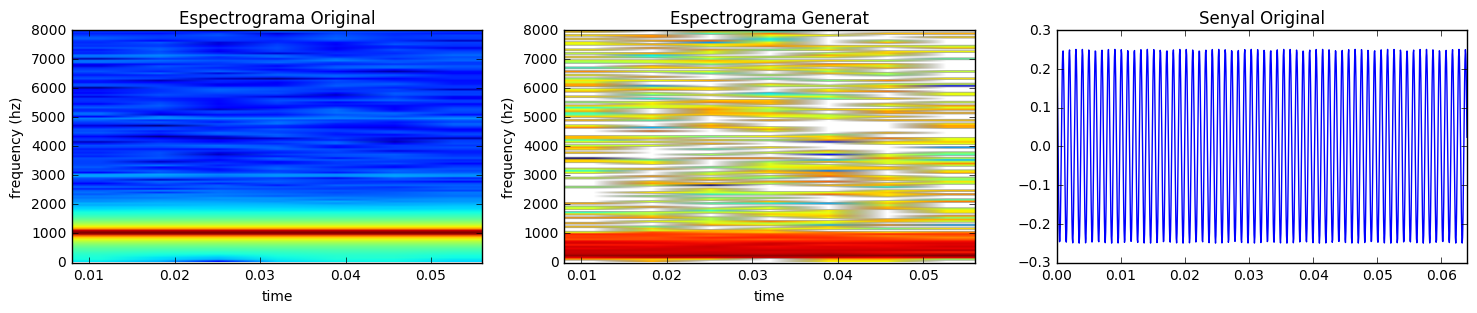

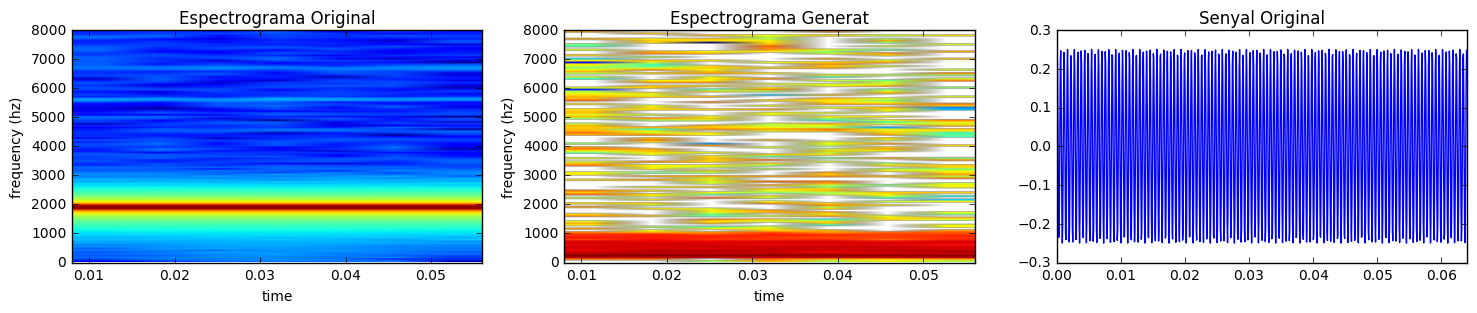

In [6]:
for index in indexos:
    hp.plot_3spec(audio_original[index], audio_recuperat[index], info[index])

In [7]:
sess.close()
tf.reset_default_graph() 

# Resultats sons de tennis

In [7]:
net = AutoEncoderSpectrogram(batch_size = 8, histograms = True)
reader = AudioReaderSpectrogram(audio_dir='../WaveNet/corpus/', sample_rate=16000, sample_size=1024, size_queue = 500)
sess, cost_squared = train_net(net, reader, 40000, error = 'squared')

100%|██████████| 40000/40000 [23:45<00:00, 28.06it/s]


saving model:logdir/AE_A/2017-01-15T10-57-41/autoencoder_audio.ckpt-39999...
Optimization Finished!
Total errors: 0


In [8]:
net = AutoEncoderSpectrogram(batch_size = 8, histograms = True)
reader = AudioReaderSpectrogram(audio_dir='../WaveNet/corpus/', sample_rate=16000, sample_size=1024, size_queue = 500)
sess, saver = load_sess(net, reader,'logdir/AE_A/2017-01-15T10-57-41/')

Trying to restore saved checkpoints from logdir/AE_A/2017-01-15T10-57-41/ ...  Checkpoint found: logdir/AE_A/2017-01-15T10-57-41/autoencoder_audio.ckpt-39999
  Global step was: 39999
  Restoring... Done.


In [9]:
audio_original, info = reader.get_batch_test(4000)
len(audio_original)

4031

In [10]:
audio_recuperat = sess.run(net.output, feed_dict={net.x: audio_original , net.keep_prob: 1.})

In [14]:
best = hp.best_results_quadratic(audio_original, audio_recuperat)
print "mean squared: ", np.mean([x[0] for x in best]), "mean snr: ",np.mean([x[1] for x in best])
print len(best)

mean squared:  1.43880300043e-11 mean snr:  -25.3892064269
4031


In [15]:
_1,_2,_3,_4,_5,_6 = 0,1, 2, 50, -50, -1
indexos = [best[_1][2], best[_2][2], best[_3][2], best[_4][2], best[_5][2], best[_6][2]]
info_mostra = [best[_1], best[_2], best[_3], best[_4], best[_5], best[_6]]
info_mostra

[(1.7560466392308795e-13, 1.5962300217470418, 118),
 (1.7867270574670718e-13, -1.6226080908970821, 3470),
 (1.8919850245118855e-13, -1.8587998618505128, 3537),
 (2.2483840597203802e-13, -10.322023963852192, 144),
 (2.1175565163417927e-10, 0.057146134441428478, 2372),
 (6.8454432568288186e-09, -0.14470564736690364, 305)]

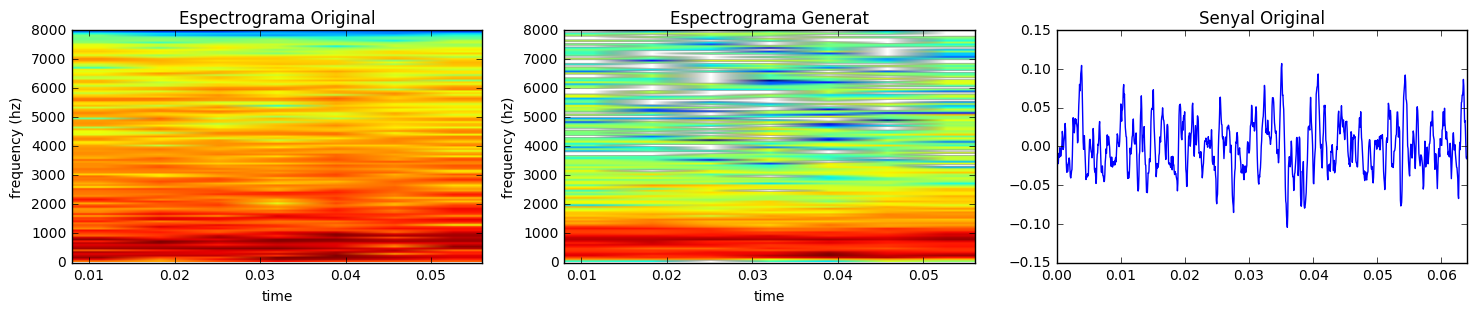

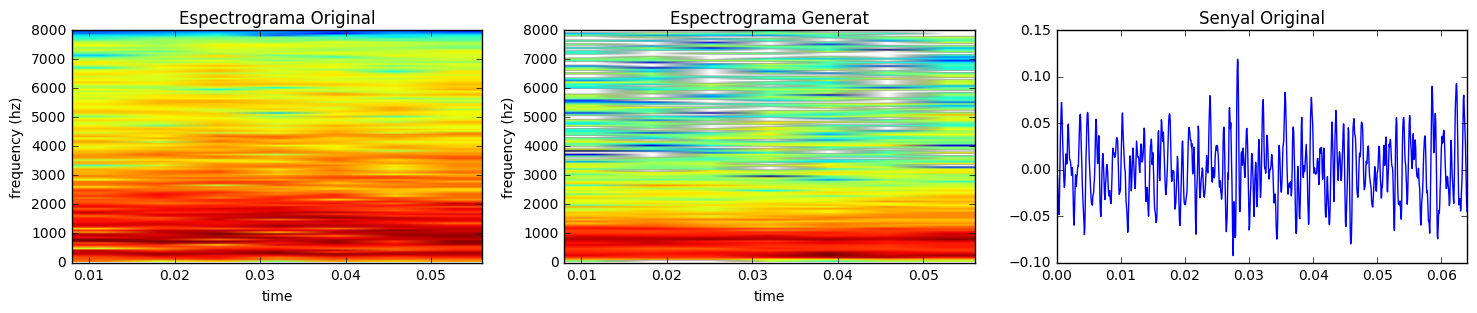

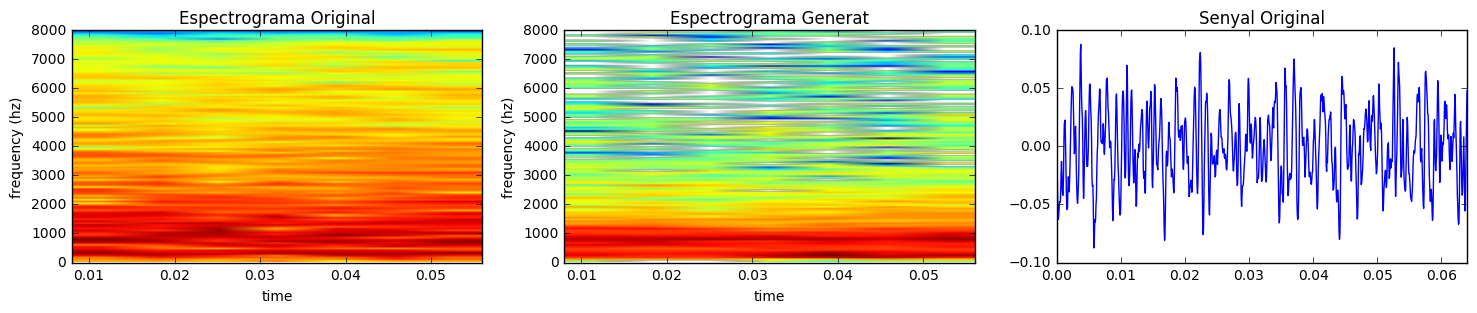

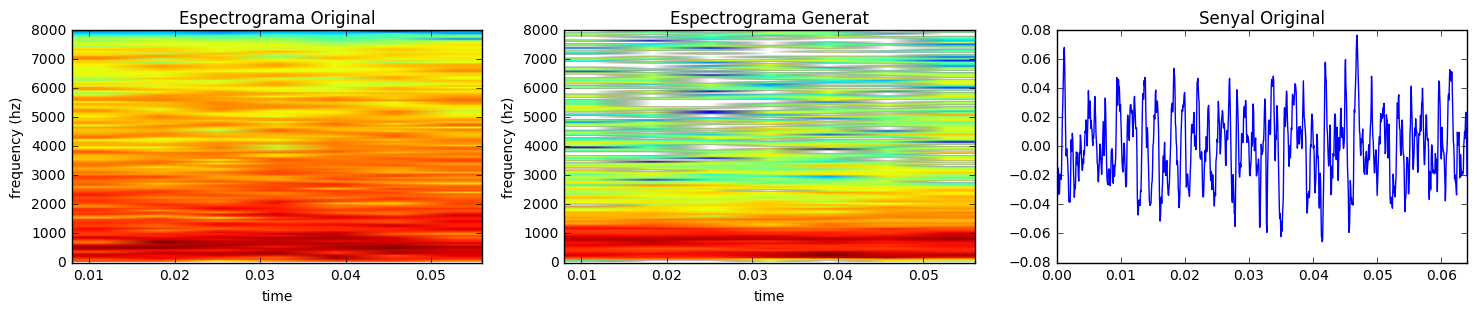

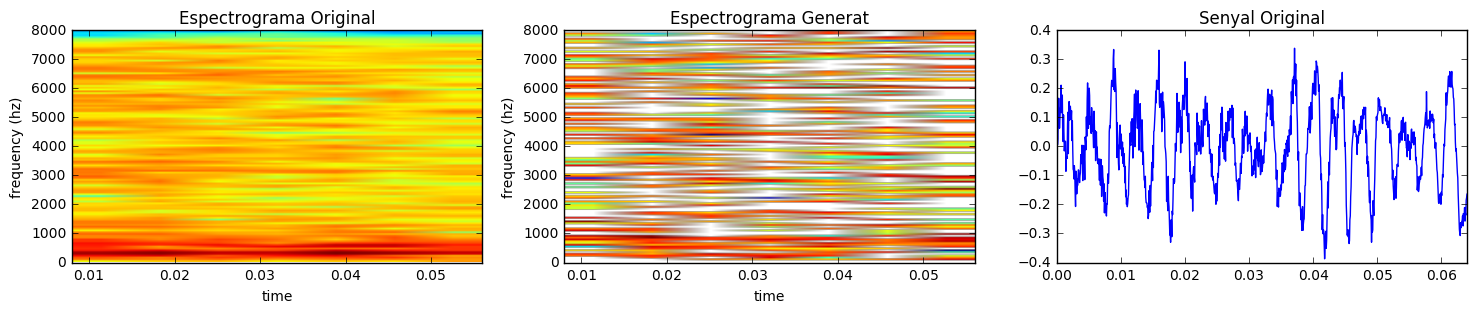

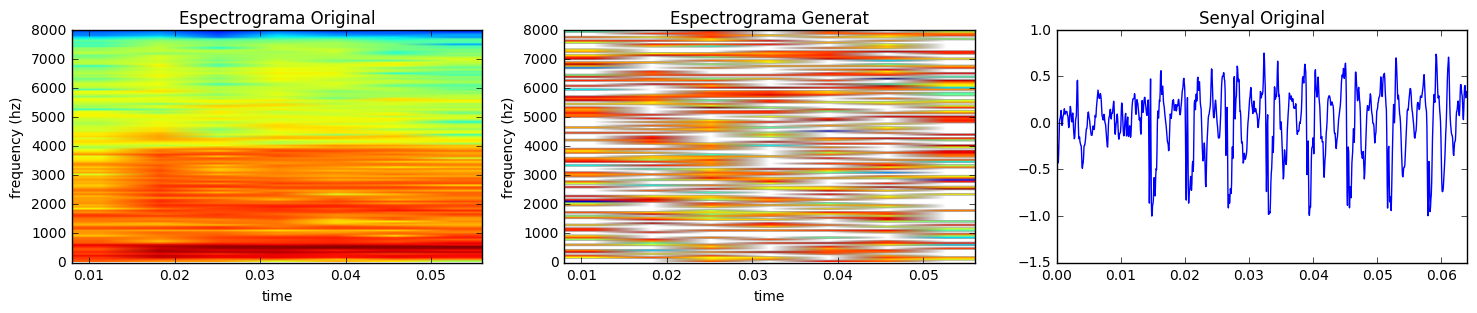

In [16]:
for index in indexos:
    hp.plot_3spec(audio_original[index], audio_recuperat[index], info[index])

In [17]:
sess.close()
tf.reset_default_graph() 